In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("crypto_master_cleaned.csv")
df.head()

,Date,open_price,high_price,low_price,close_price,volume,crypto
0,2020-12-31,0.184034,0.185749,0.176594,0.181397,1132268397,ADA
1,2021-01-01,0.181382,0.184246,0.172022,0.175350,1122218004,ADA
2,2021-01-02,0.175359,0.184253,0.169233,0.177423,1408849504,ADA
3,2021-01-03,0.177382,0.208679,0.173376,0.204995,2303857909,ADA
4,2021-01-04,0.205236,0.239661,0.194450,0.224762,3260699086,ADA


In [5]:
df1= df.copy()

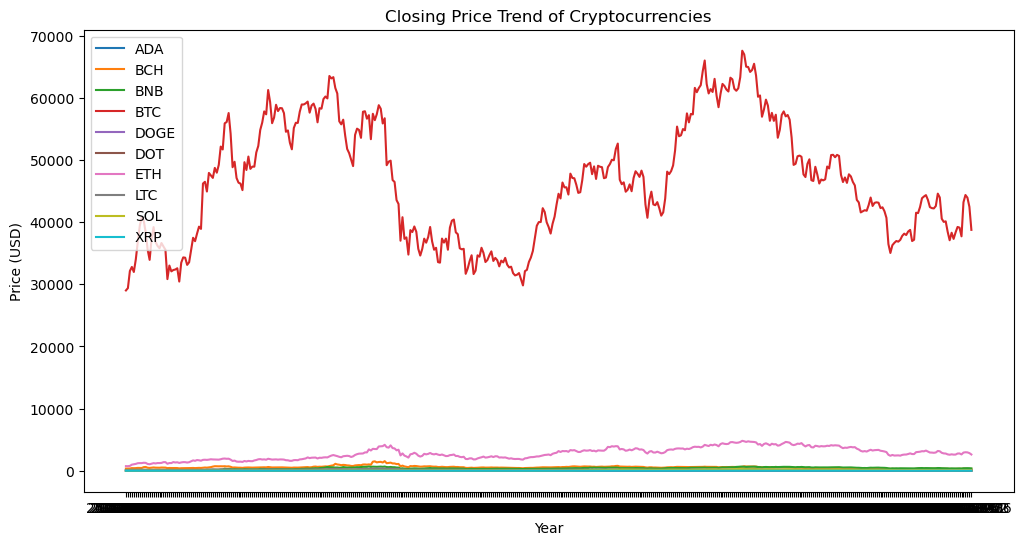

In [9]:
plt.figure(figsize=(12,6))

for crypto in df['crypto'].unique():
    subset = df[df['crypto'] == crypto]
    plt.plot(subset['Date'], subset['close_price'], label=crypto)

plt.title("Closing Price Trend of Cryptocurrencies")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

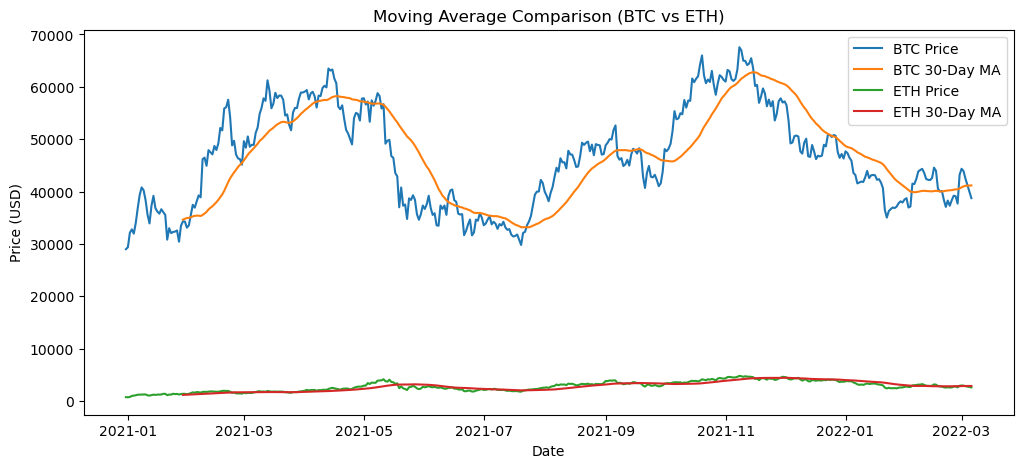

In [12]:
btc = df[df['crypto'] == 'BTC'].copy()
eth = df[df['crypto'] == 'ETH'].copy()

btc['Date'] = pd.to_datetime(btc['Date'])
eth['Date'] = pd.to_datetime(eth['Date'])

btc['MA_30'] = btc['close_price'].rolling(30).mean()
eth['MA_30'] = eth['close_price'].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(btc['Date'], btc['close_price'], label='BTC Price')
plt.plot(btc['Date'], btc['MA_30'], label='BTC 30-Day MA')
plt.plot(eth['Date'], eth['close_price'], label='ETH Price')
plt.plot(eth['Date'], eth['MA_30'], label='ETH 30-Day MA')

plt.legend()
plt.title("Moving Average Comparison (BTC vs ETH)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

In [13]:
df['daily_return'] = df.groupby('crypto')['close_price'].pct_change()

df['volatility_30'] = df.groupby('crypto')['daily_return'].rolling(30).std().reset_index(level=0, drop=True)

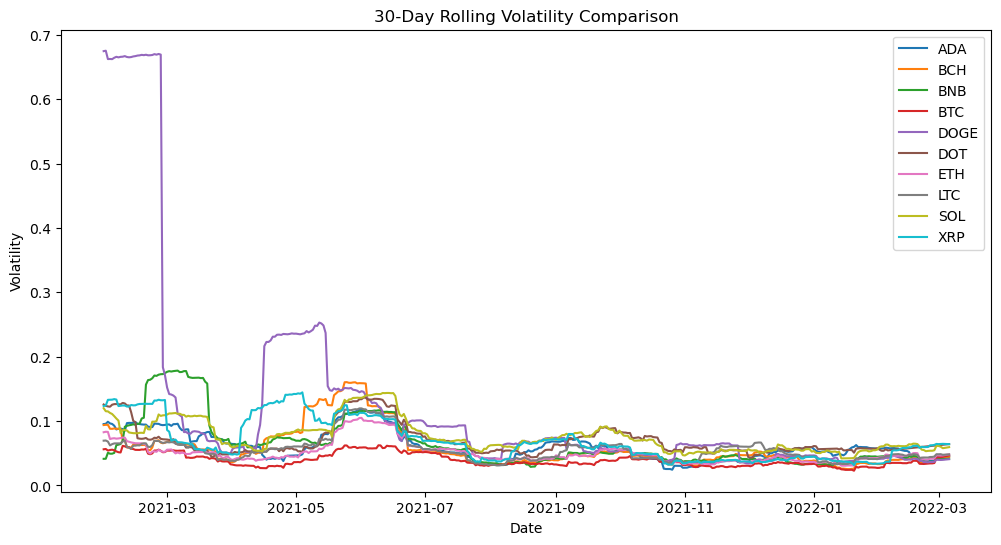

In [17]:
plt.figure(figsize=(12,6))

for crypto in df['crypto'].unique():
    subset = df[df['crypto'] == crypto].copy()
    subset['Date'] = pd.to_datetime(subset['Date'])

    plt.plot(subset['Date'], subset['volatility_30'], label=crypto)

plt.title("30-Day Rolling Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

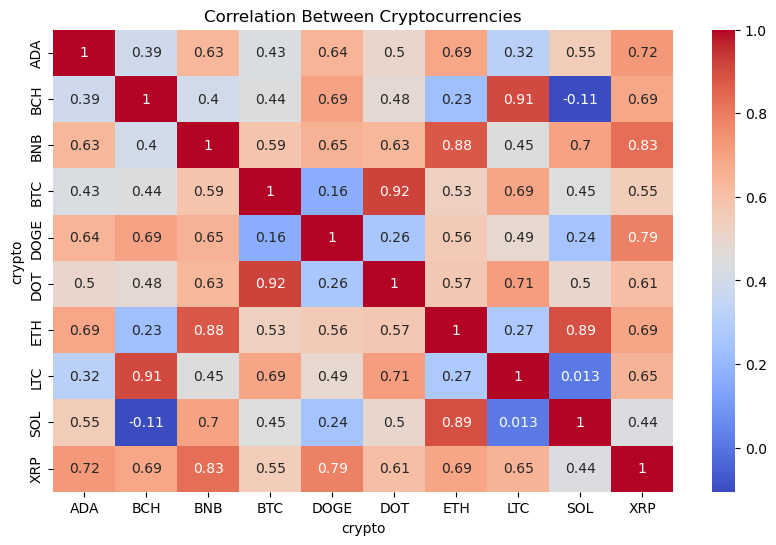

In [18]:
pivot_df = df.pivot_table(
    values='close_price',
    index='Date',
    columns='crypto'
)

corr_matrix = pivot_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Cryptocurrencies")
plt.show()
